<h5>Plotando curva de histerese para cada ângulo (sem normalização).</h5>
<p>Este script varre o diretorio onde estão localizados os arquivos .txt contendo as medidas cruas obtidas no VSM e plota eles num gráfico. Assim, é possível visualizar quais conjuntos de medidas apresentam drift, que podem ser ajustadas utilizando o script <code>faseB_histereseAjusteDeDrift</code>.</p>

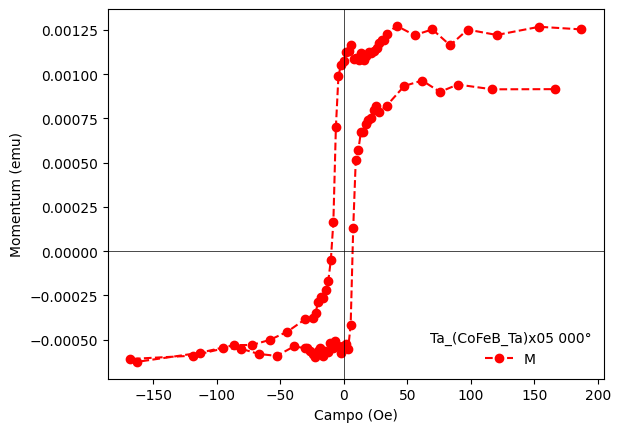

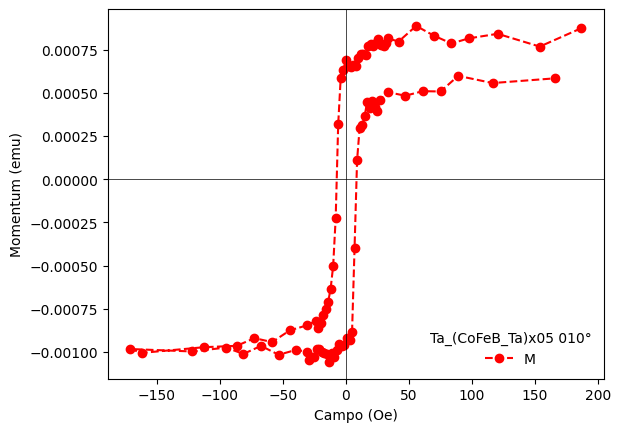

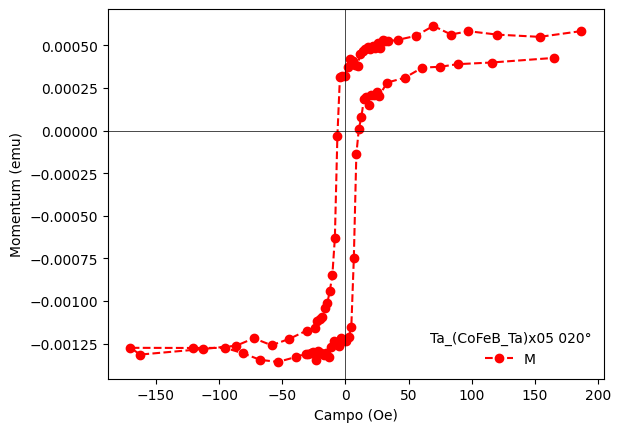

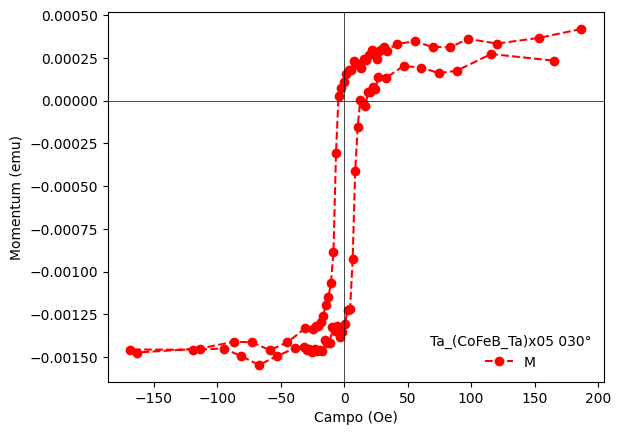

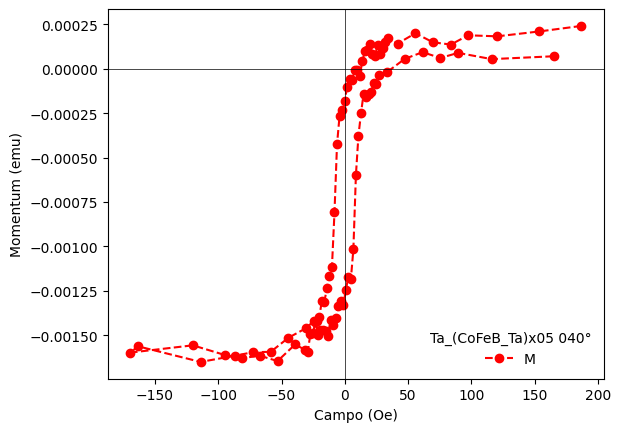

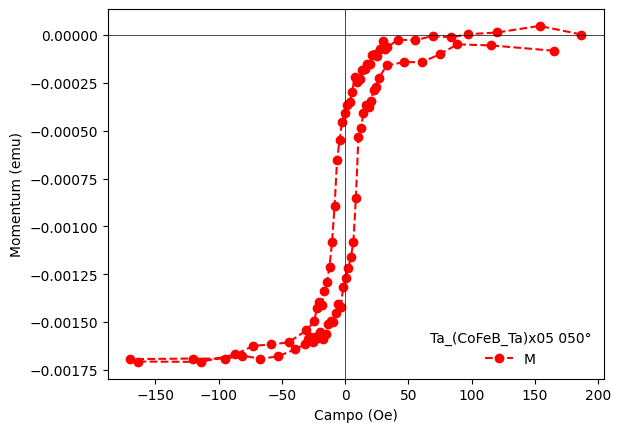

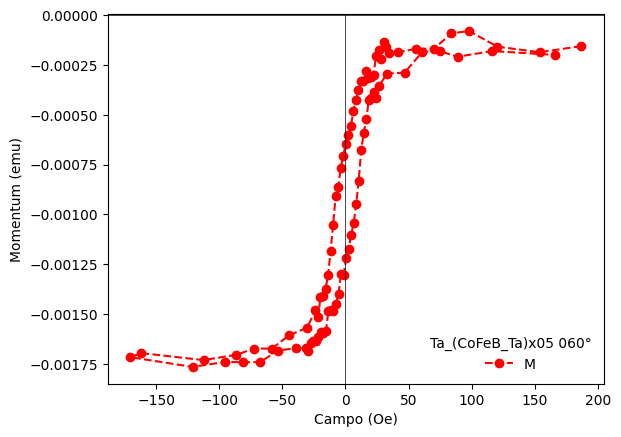

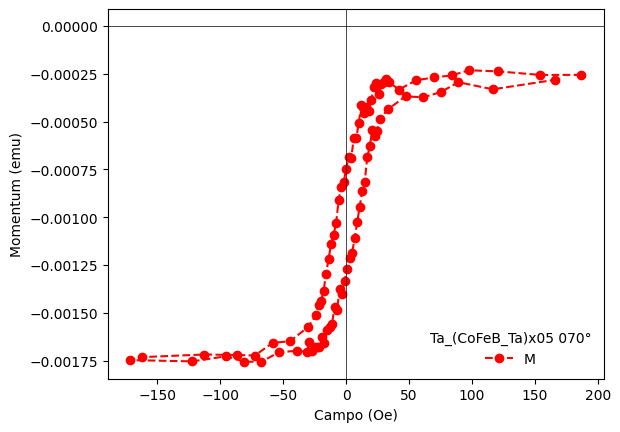

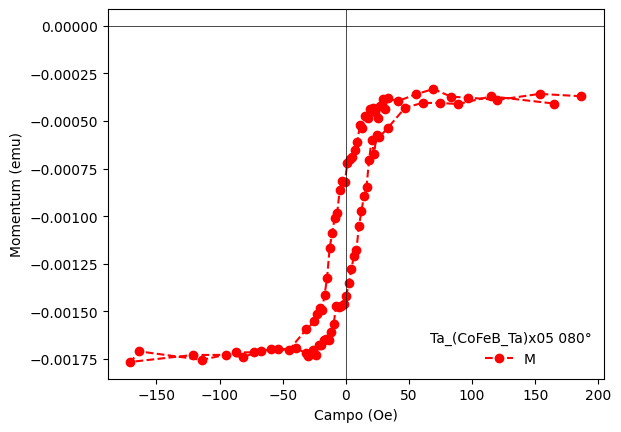

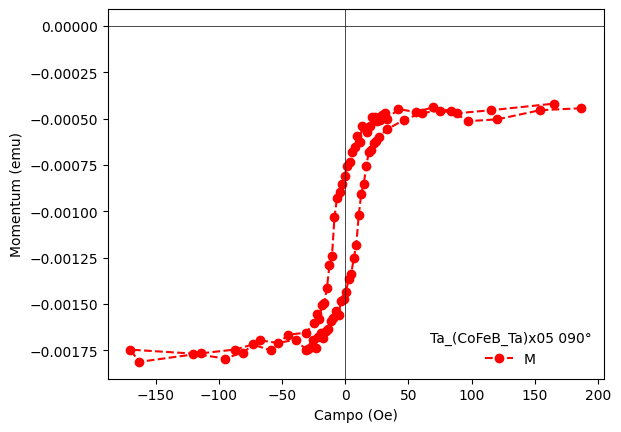

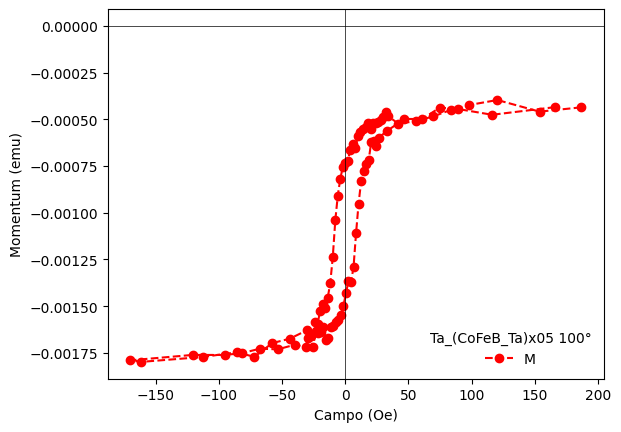

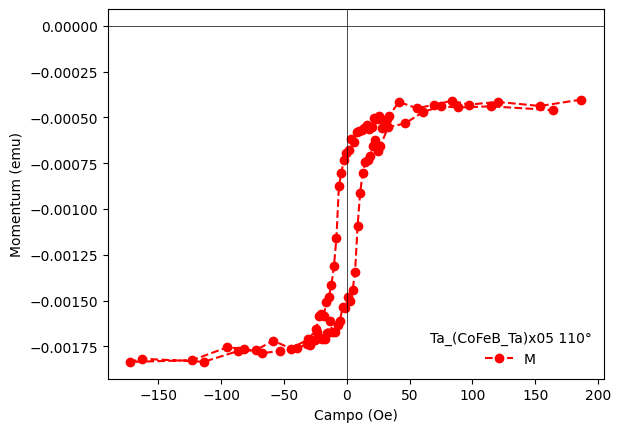

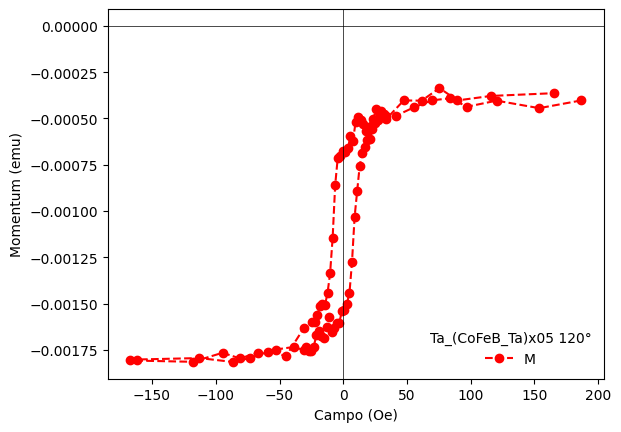

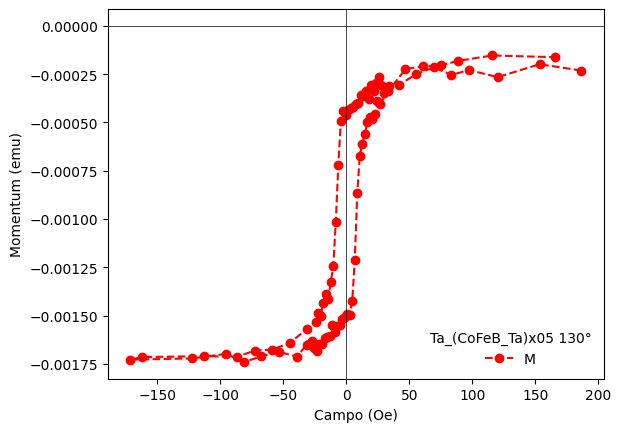

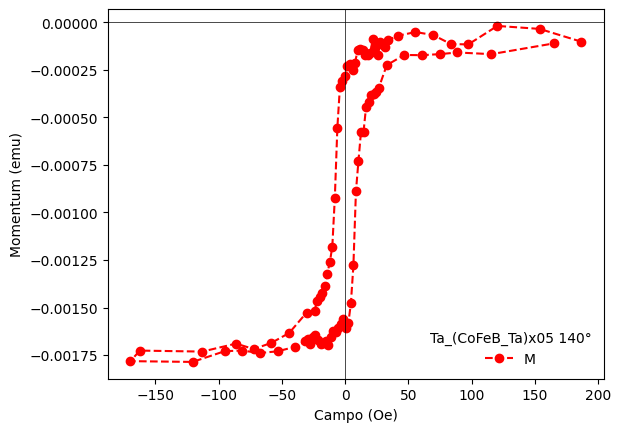

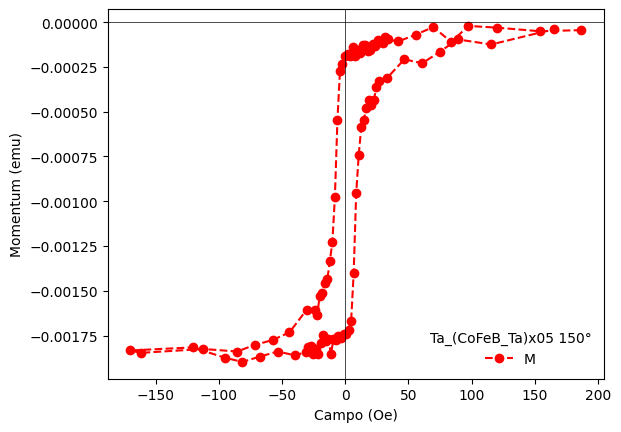

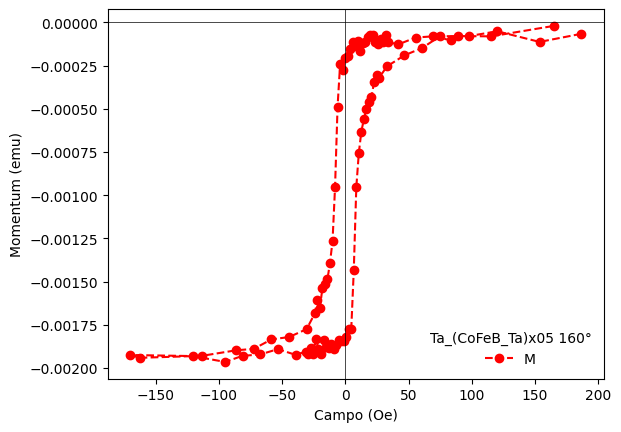

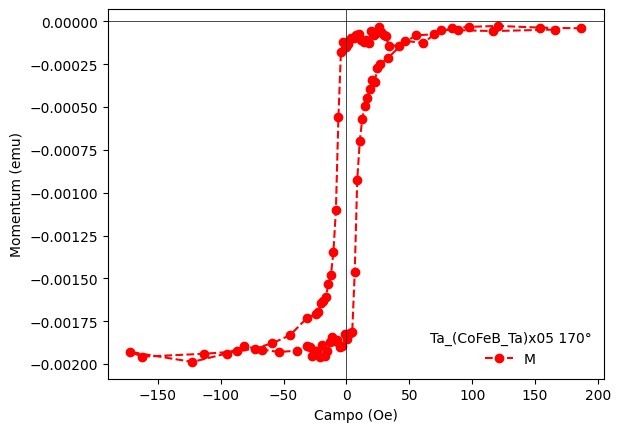

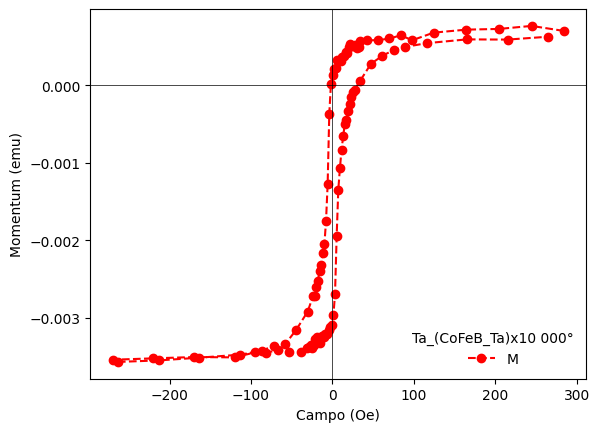

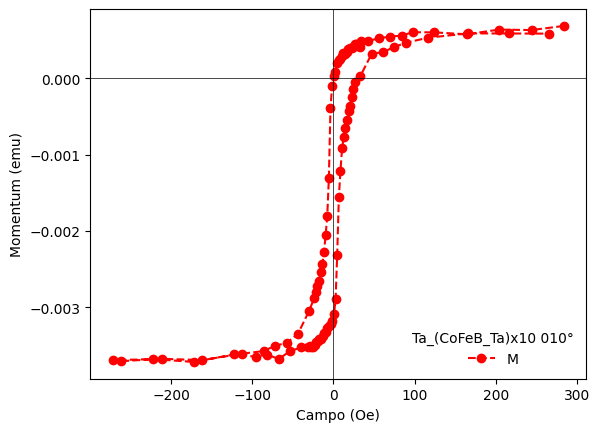

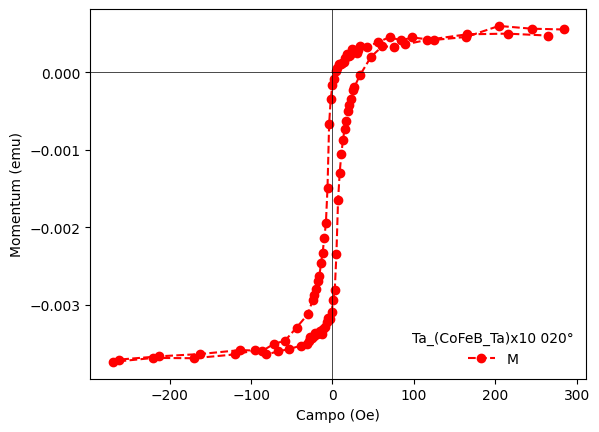

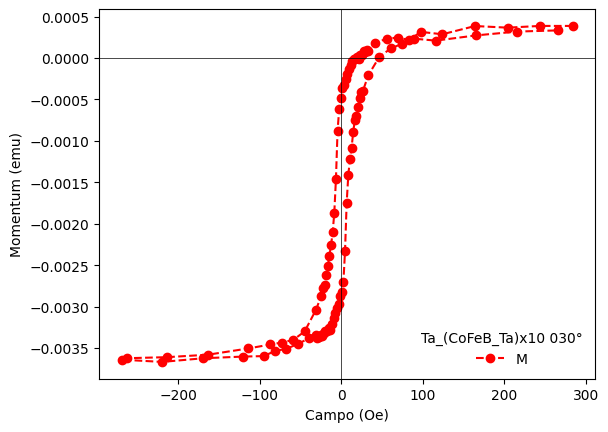

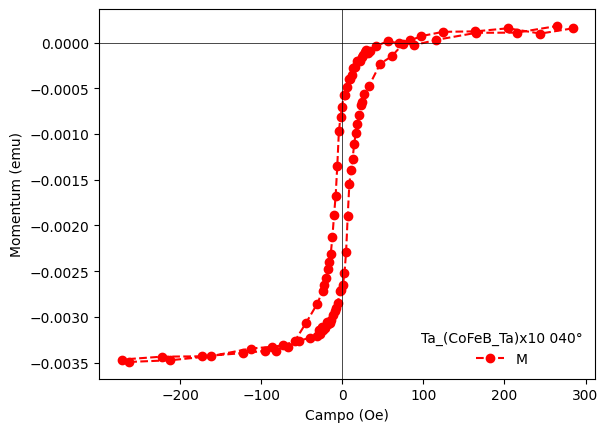

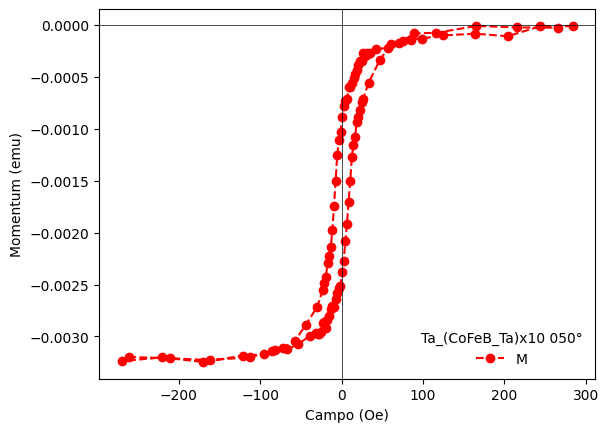

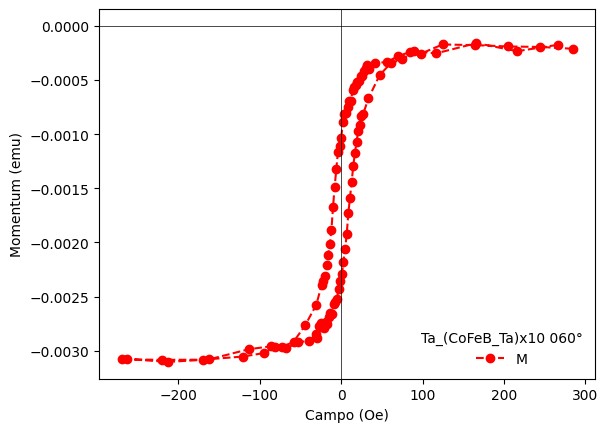

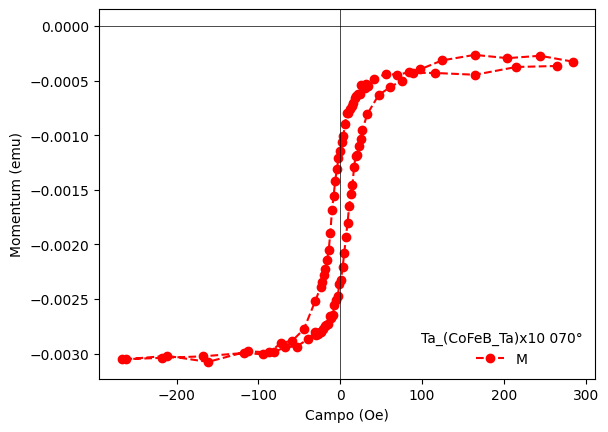

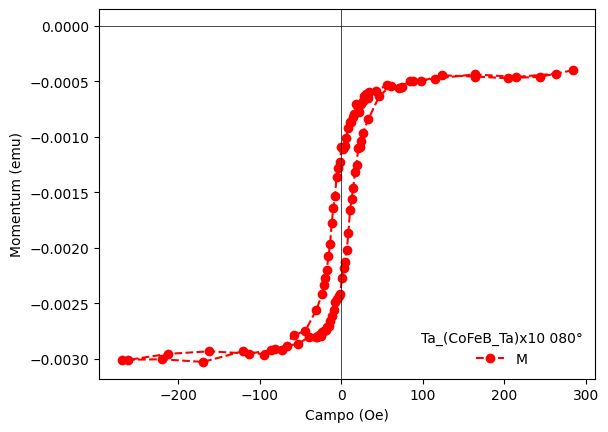

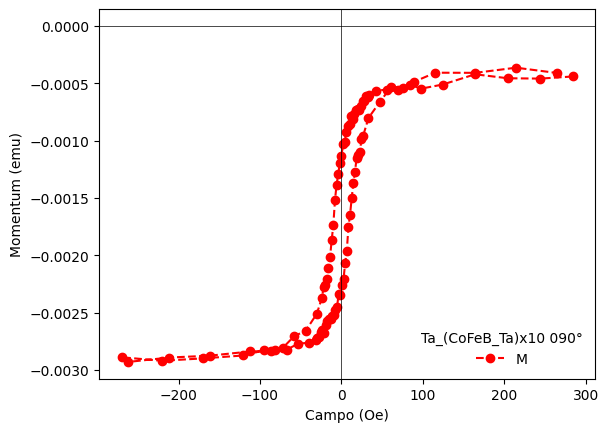

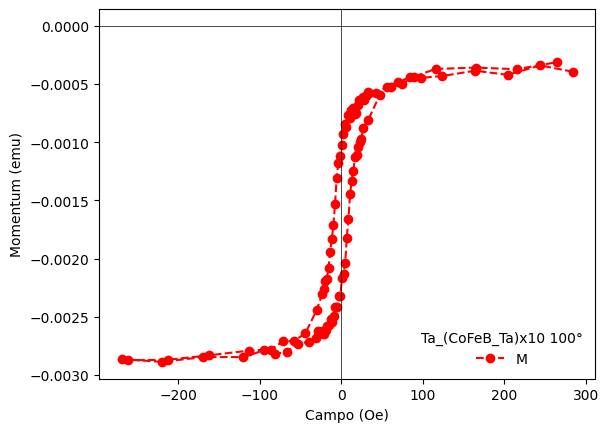

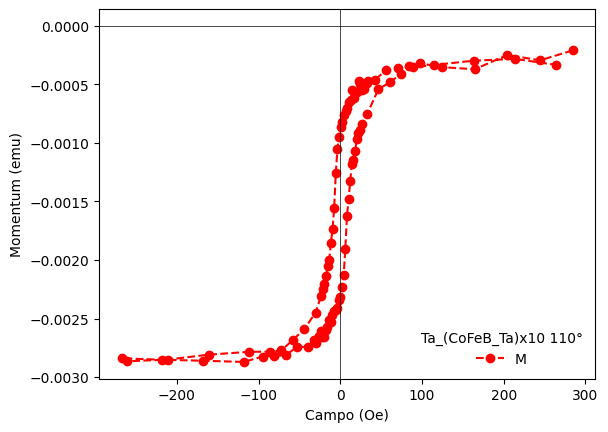

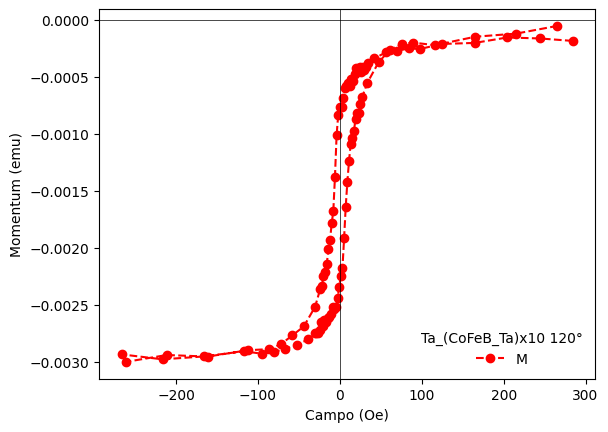

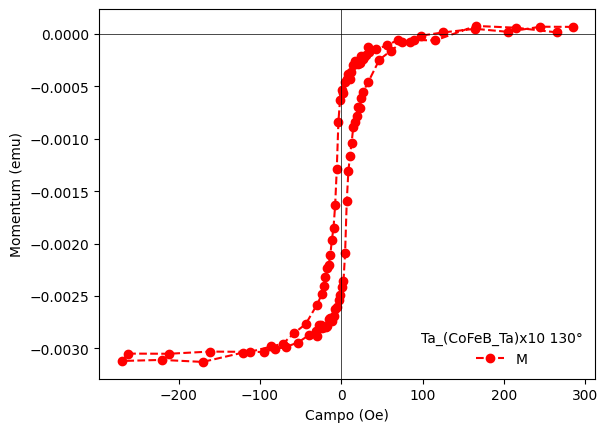

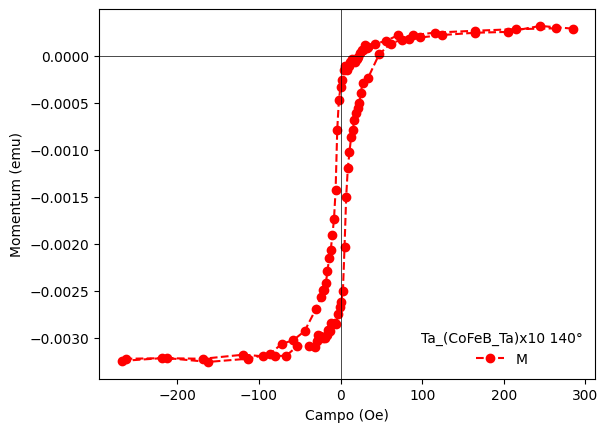

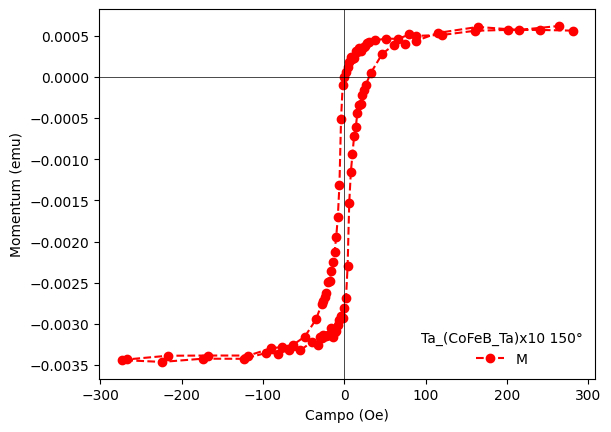

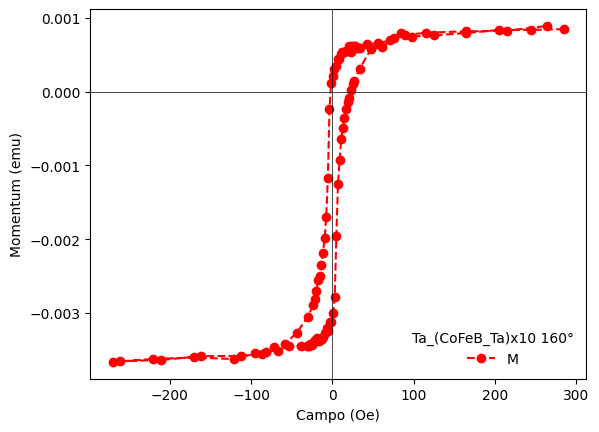

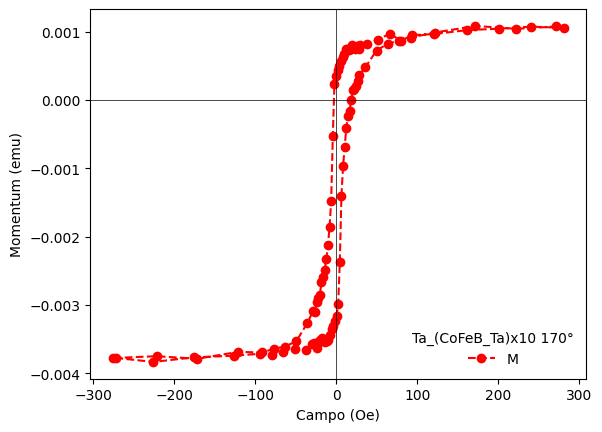

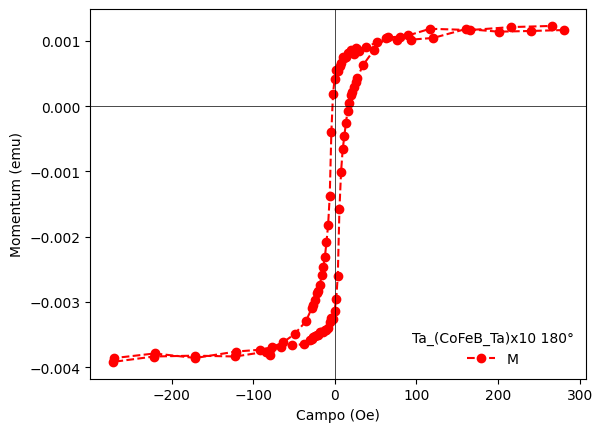

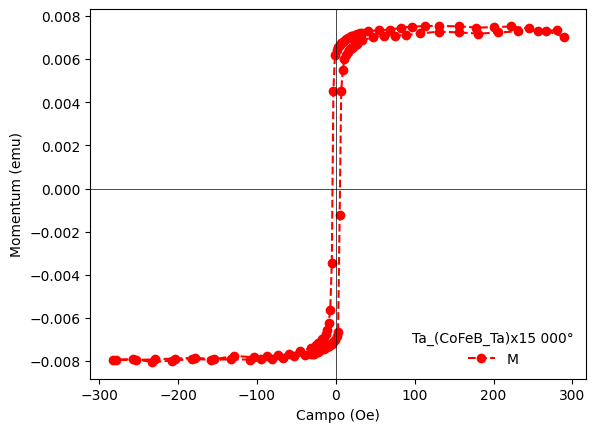

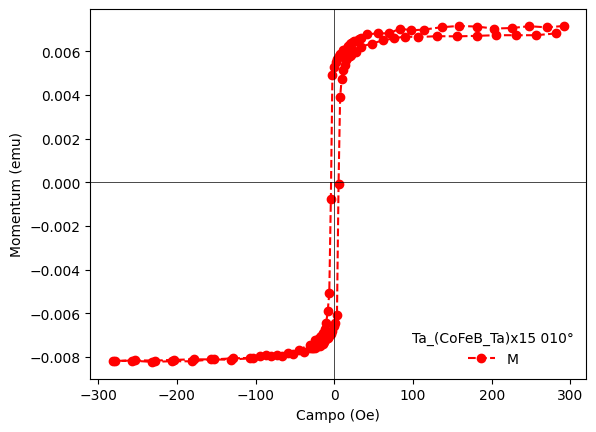

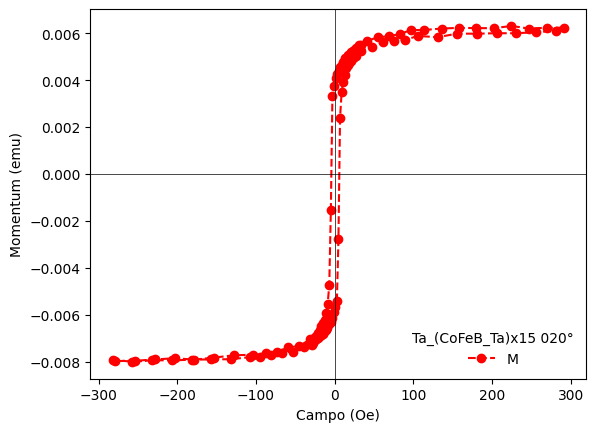

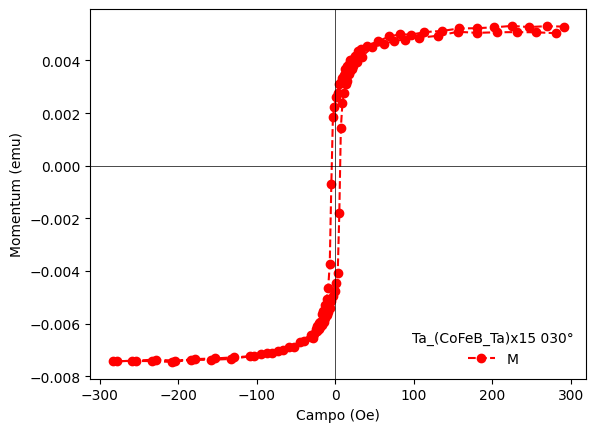

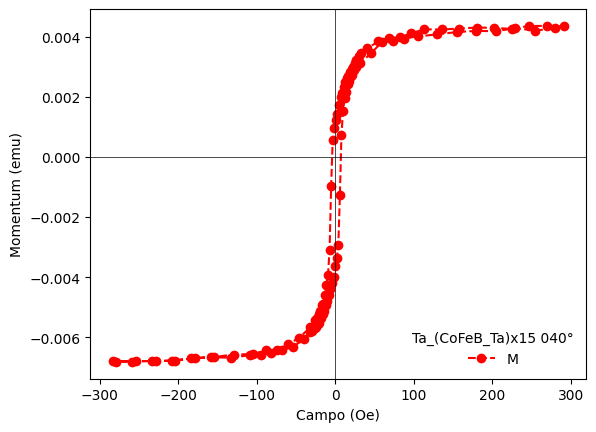

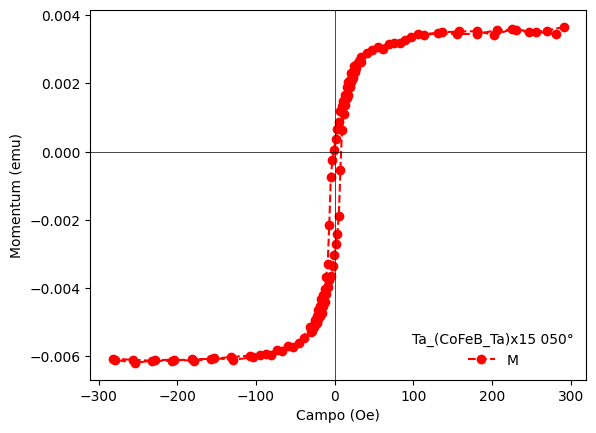

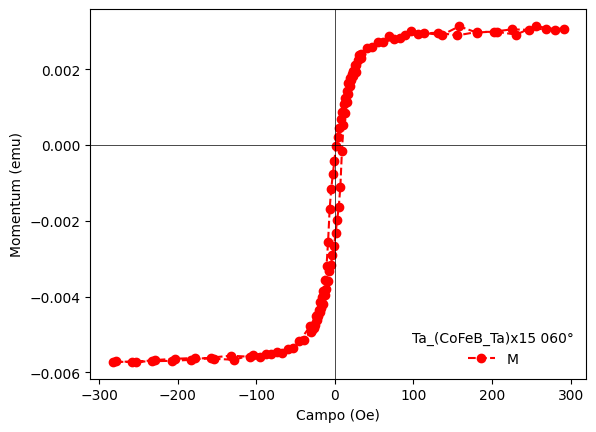

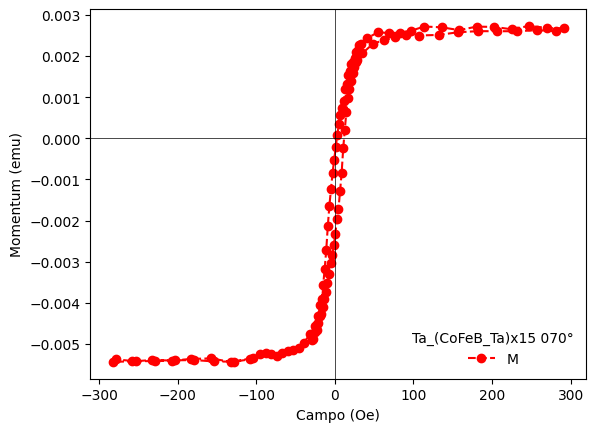

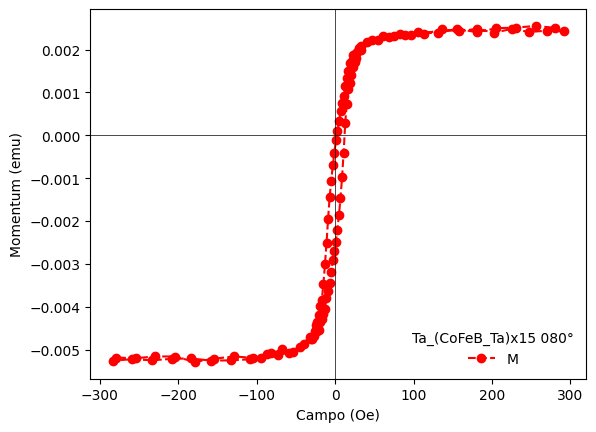

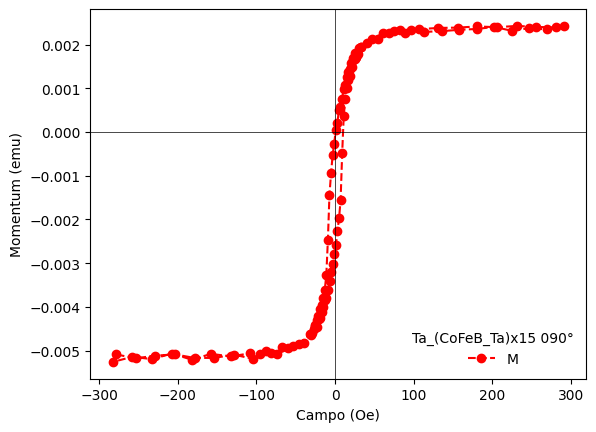

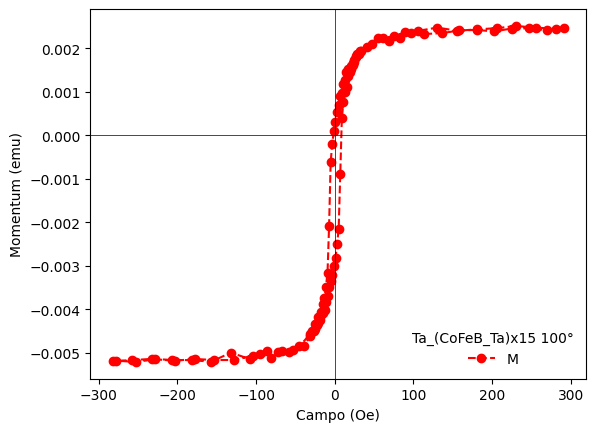

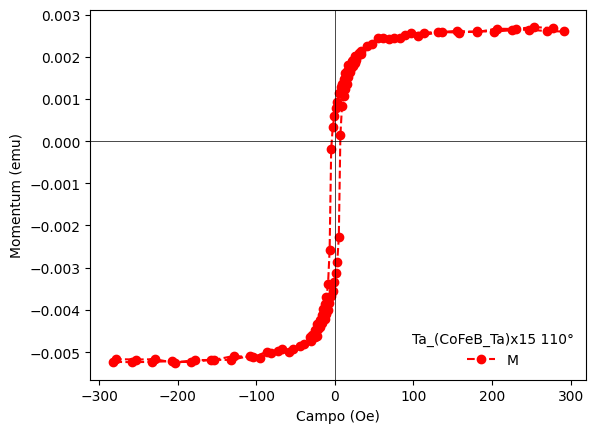

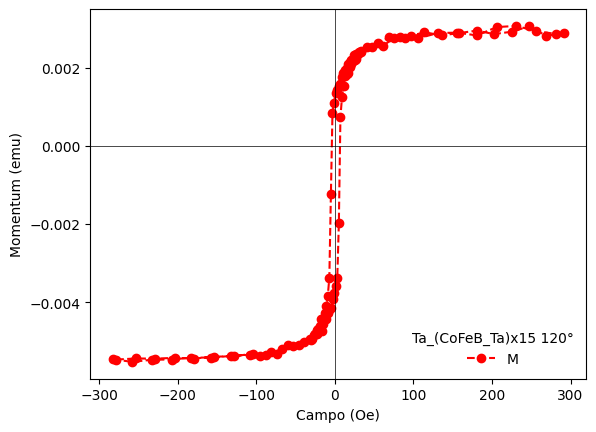

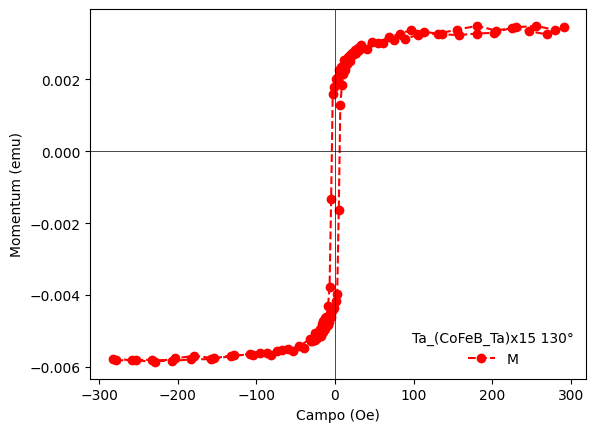

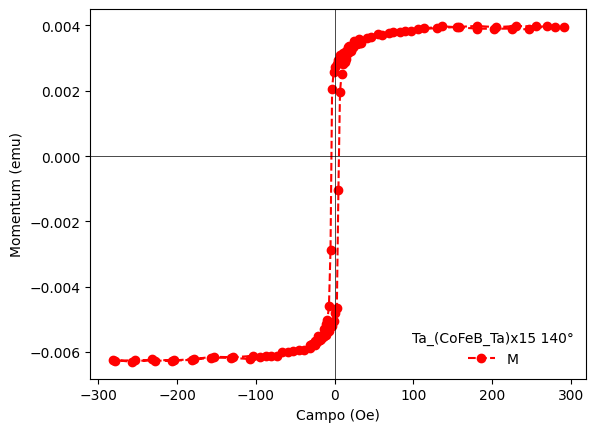

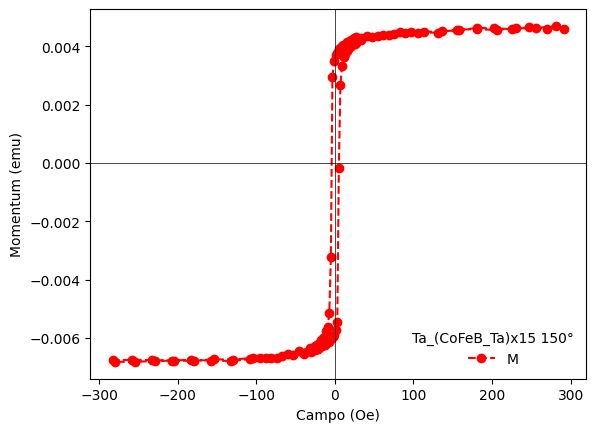

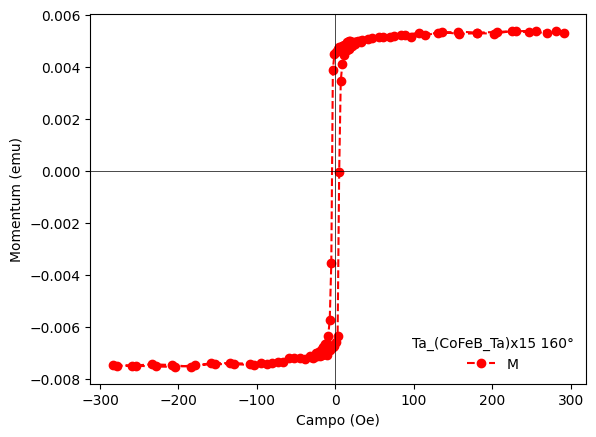

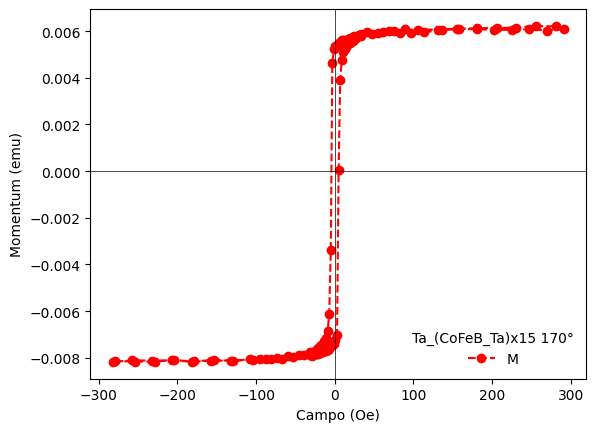

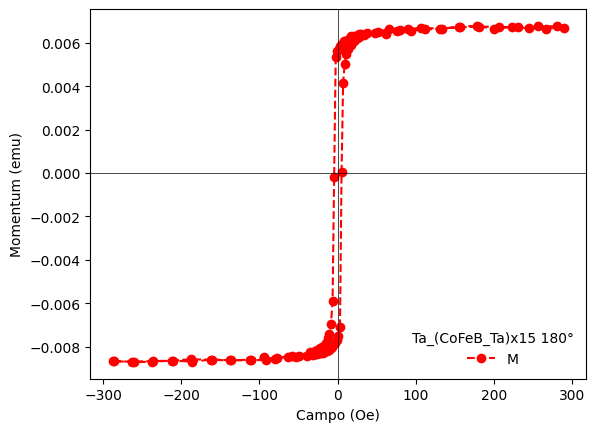

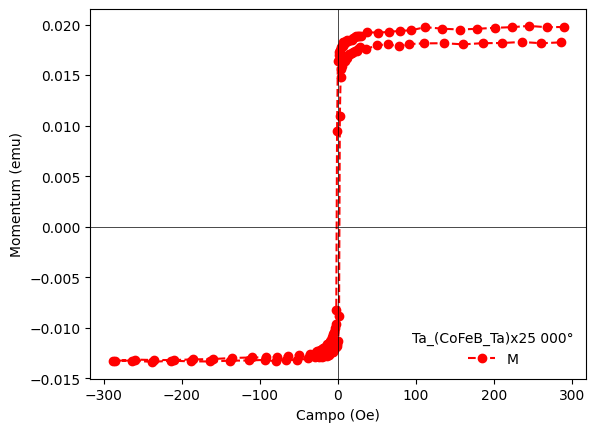

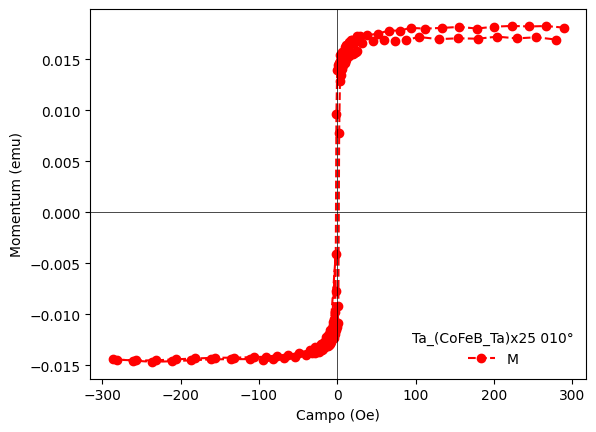

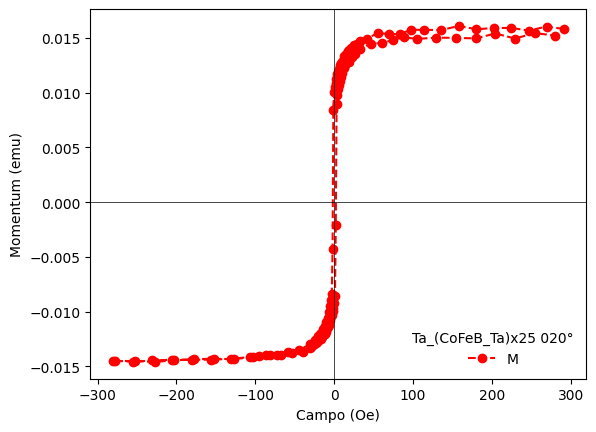

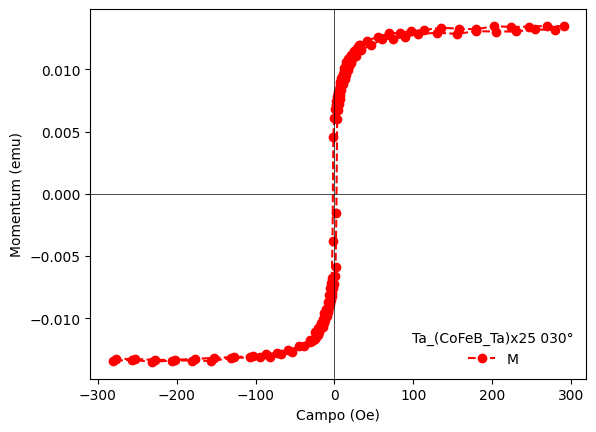

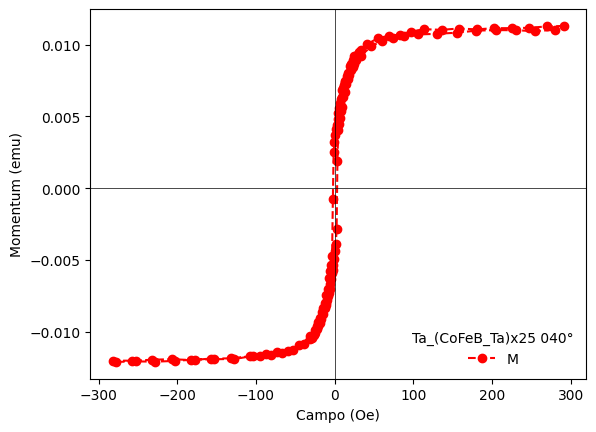

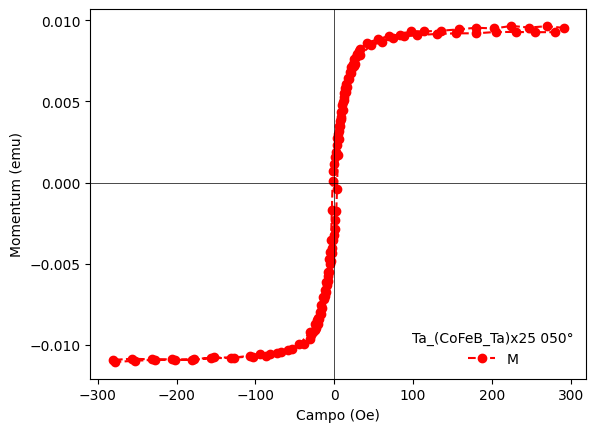

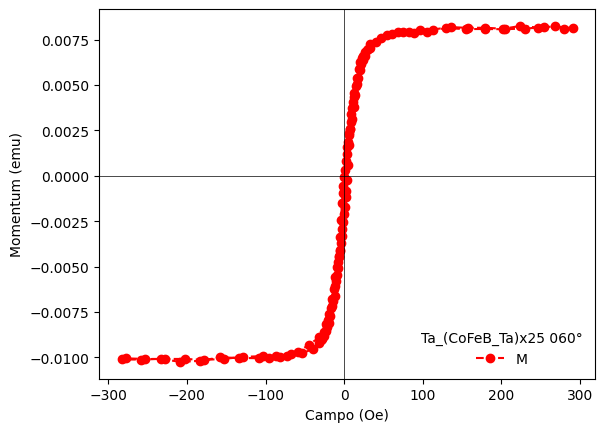

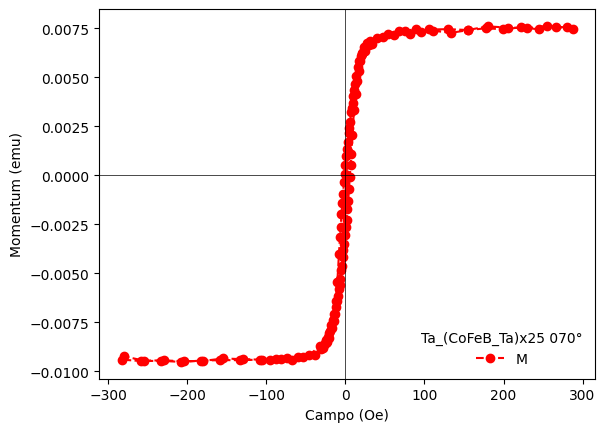

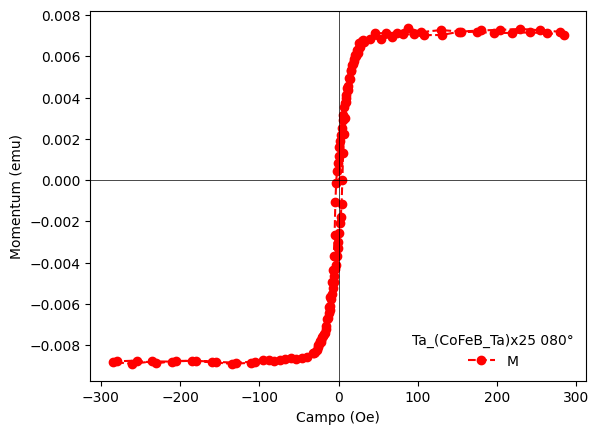

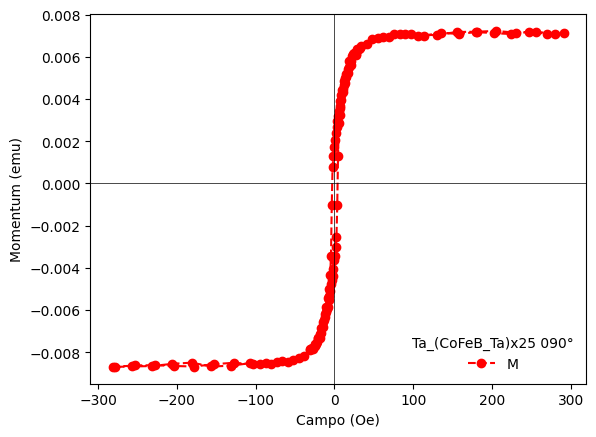

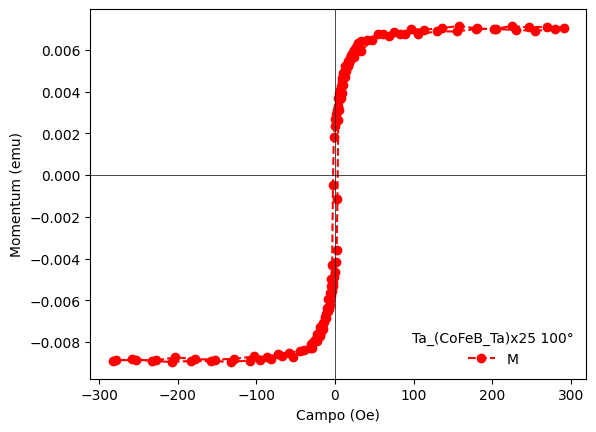

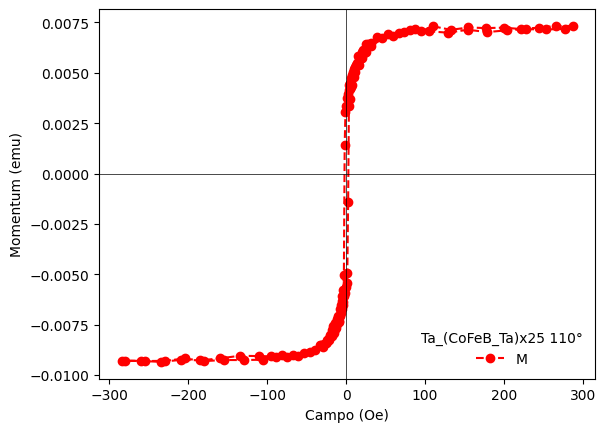

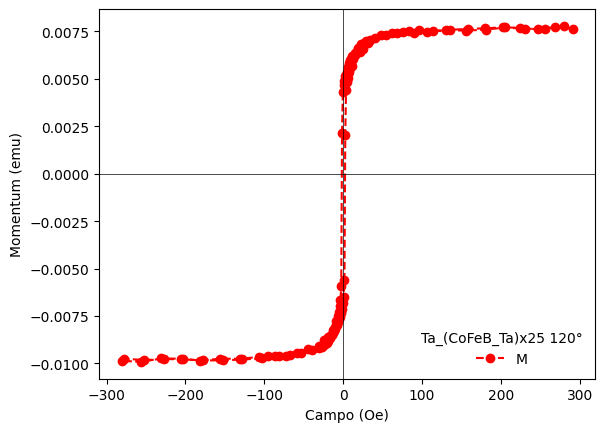

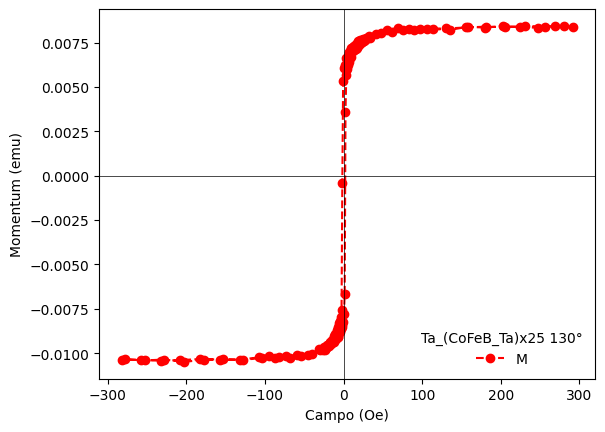

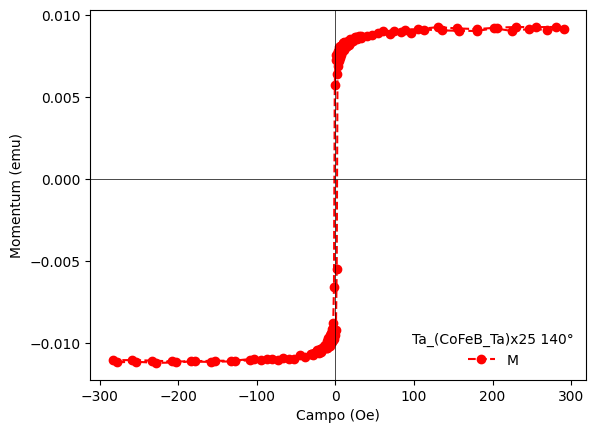

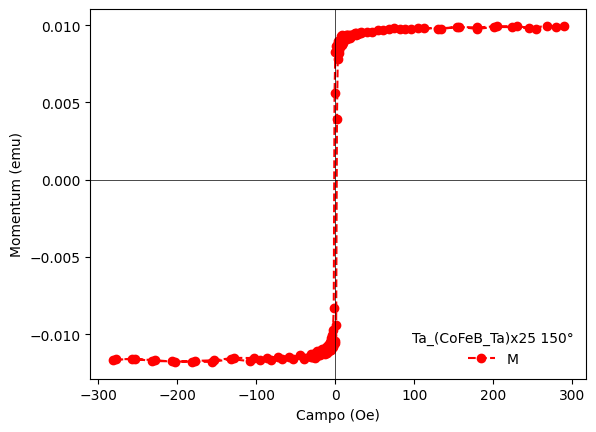

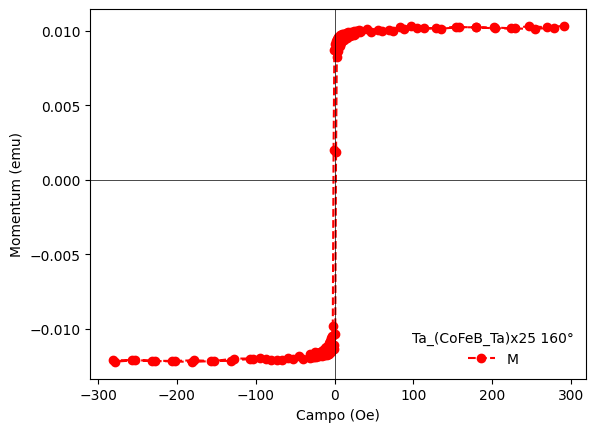

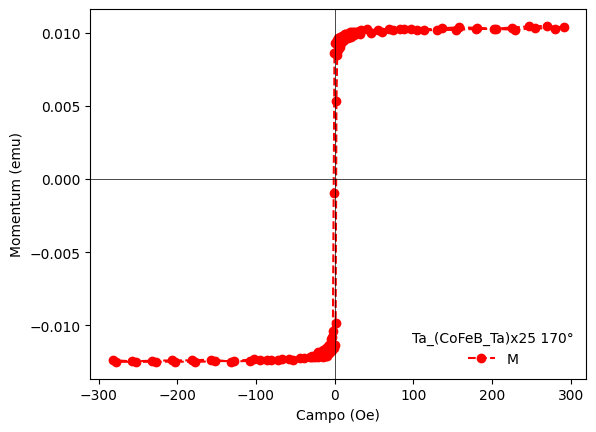

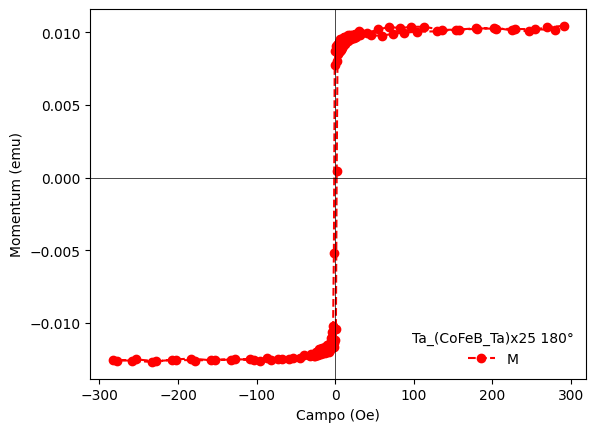

In [1]:
"""
CARREANDO MÓDULOS NECESSÁRIOS
"""

import numpy as np #biblioteca usada para manipulação de matrizes e aplicações matemáticas -CLEIZA #type: ignore
import matplotlib.pyplot as plt #bibioteca para plot de figuras -CLEIZA #type: ignore
import os #biblioteca para manipulação de diretórios e arquivos -CLEIZA
from caminhosDosDiretorios import diretorioDeDadosDesteDispositivo as caminhoDirDados, diretorioDeGraficosDesteDispositivo as caminhoDirGraficos #de caminhoDosDiretorios.py, chamamos aqui duas variáveis que guardam respectivamente o caminho do diretório onde estão os arquivos de dados deste dispositivo e o caminho do diretório onde serão salvos os gráficos neste dispositivo -ABQ
from funcoesDeNomeDeArquivo import extrairPartesDoNome, extrair_angulo, nomeConcatenadoDaAmostra #de funcoesDeNomeDeArquivo.py, chamamos aqui funcoes que extraem partes do nome do arquivo -ABQ


"""
CHAMANDO E RECONHECENDO DADOS
"""

#subdiretorio especifico que este script vai varrer para extrair os dados especificos, neste caso, será "/dadosCrus/". -ABQ
subdiretorioDeDadosAVarrer = caminhoDirDados+"dadosCrus/"

# Lista todos os arquivos na pasta -CLEIZA
arquivos = os.listdir(subdiretorioDeDadosAVarrer)

# Filtra apenas os arquivos .txt -CLEIZA
arquivos_txt = [arquivo for arquivo in arquivos if arquivo.endswith('.txt')]

# Função para extrair o ângulo do nome do arquivo. Para aplicação da função é necessário que os arquivos .txt estejam nomeados seguindo o exemplo:Ta_CoFeB_Ag_x15_00.txt (ou Ta_CoFeB_Ag_x_05_000.txt, podendo ser ajustado -ABQ). Ou seja, com os últimos dígitos referenciando o ângulo de cada medida -CLEIZA

# Ordena os arquivos pelo ângulo -CLEIZA
#arquivos_txt.sort(key=extrair_angulo) 
#PERGUNTA: qual a razao pratica para essa linha? -ABQ

"""
DEFININDO CARACTERÍSTICAS DAS FIGURAS (OPTATIVO)
"""

# Define o tamanho da figura (opcional) -CLEIZA
#fig_size = (10, 8)

# Define o tamanho da fonte dos rótulos dos eixos x e y -CLEIZA
#fonte_eixos = 14

# Define o tamanho da fonte dos títulos -CLEIZA
#fonte_titulo = 16

# Define o tamanho dos números nos eixos x e y -CLEIZA
#tamanho_numeros = 12

# Define o tamanho da fonte da legenda -CLEIZA
#tamanho_legenda = 12


# Itera sobre os arquivos para criar os gráficos
for arquivo_txt in arquivos_txt:
    #extrai o nome da amostra do arquivo -ABQ
    nomeDaAmostraEAngulo = f"{nomeConcatenadoDaAmostra(arquivo_txt)} {extrair_angulo(arquivo_txt)}°"

    # Extrai o ângulo do nome do arquivo
    angulo = extrair_angulo(arquivo_txt)

    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(subdiretorioDeDadosAVarrer, arquivo_txt)
    
    # Carrega os dados do arquivo, ignorando 12 linhas
    dados = np.loadtxt(caminho_arquivo, skiprows=12)

    # Extrai os dados de campo e magnetização
    campo = dados[:, 0]
    magnetizacao = dados[:, 1]
    
    # Cria uma nova figura com tamanho definido (optativo)
    #plt.figure(figsize=fig_size)
    
    # Plota a curva de histerese
    plt.plot(campo, magnetizacao, "--o", color='red')

    # Adiciona linhas de eixo
    plt.axhline(0, color='black', linewidth=0.5)  # Linha de grade zero para magnetização
    plt.axvline(0, color='black', linewidth=0.5)  # Linha de grade zero para campo

    # Adiciona grade ao gráfico (optativo)
    #plt.grid(True, which='both', linestyle='-', color='gray',  linewidth=0.3)
    #plt.grid(True, which='major', axis='both', color='gray', linewidth=0.3)
    
    # Adiciona rótulos com tamanho de fonte personalizado -CLEIZA
    plt.xlabel('Campo (Oe)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.ylabel('Momentum (emu)') #optativamente, adicione aqui o argumento "fontsize=fonte_eixos" -ABQ
    plt.legend(["M"], loc = "lower right", title=f"{nomeDaAmostraEAngulo}", frameon=False)
    
    # Adiciona título com tamanho de fonte personalizado (optativo) -CLEIZA
    #plt.title(f'Curva de histerese (Ta_CoFeB_Ag_x15) para o ângulo {angulo}°', fontsize=fonte_titulo)
    
    # Define o tamanho dos números nos eixos x e y (optativo) -CLEIZA
    #plt.tick_params(axis='both', which='major', fontsize=tamanho_numeros)
    
    #salva a figura em formato png dentro do diretorio graficosCrus, que por sua vez fica no diretorio graficosGerados -ABQ
    plt.savefig(f"{caminhoDirGraficos}/graficosCrus/{nomeDaAmostraEAngulo}_Cru.png", dpi=300)
    
    # Exibe o gráfico -CLEIZA
    plt.show()